In [1]:
import h5py
import numpy as np
from batch_sense import SENSE
import mriutils
import os
import torch
import scipy.io
os.environ["BART_PATH"]    = 'bart'
os.environ["OMP_NUM_THREADS"] = "1"
fname = 'COIL_FASTMRI_noshift/multicoil_test/file_brain_AXT2_210_2100295.h5'
from mrfftv2 import fft2c,ifft2c,center_crop
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr

index=10
with h5py.File(fname, "r") as hf:
    kspace = hf["kspace"][index]
    rss = hf["reconstruction_rss"][index]
    height,weight = rss.shape
    kspace = fft2c(center_crop(ifft2c(kspace),(height,weight)))
    
    # mmax = target.max()
    # norm_kspace = kspace/mmax
    # print(norm_kspace.shape)
    # norm_target = target/mmax
    
    
real_mask = np.zeros(kspace.shape)
real_mask[:,(index%3)::3,:] = 1
real_masked_kspace = kspace*real_mask#(16,384,384)

subsample_kspace_complex = torch.from_numpy(real_masked_kspace)
R = [3,1]
acc_factor = torch.tensor(R)
slice_sub_kspace = subsample_kspace_complex.permute(1,2,0)[None]
###################1111111

/opt/tljh/user/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt
import mrfftv2 as mrfft

bart ecalib -m1 -c0 /tmp/tmpikc1m2j9in0 /tmp/tmpikc1m2j9out0
Done.
0.74187547
PSNR: 24.462788792713383 SSIM: 0.7174041127813922


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


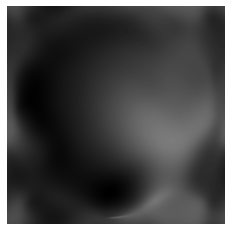

bart ecalib -m1 -P -c0 /tmp/tmp_h8bjdlein0 /tmp/tmp_h8bjdleout0
Done.
0.7418755
PSNR: 24.463511043395574 SSIM: 0.7174047023348422


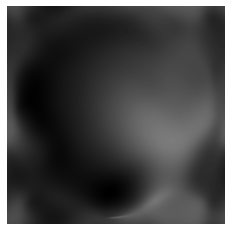

bart ecalib -m1 -W -c0 /tmp/tmproojzyriin0 /tmp/tmproojzyriout0
Done.
0.8422608
PSNR: 34.24968512892689 SSIM: 0.8025093318006187


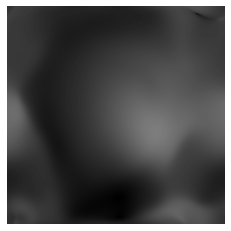

In [3]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    print(abs(sens_maps).max())
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.0001)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpvz12zvjqin0 /tmp/tmpvz12zvjqout0
Done.
PSNR: 27.111926569818323 SSIM: 0.7175737997505227


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


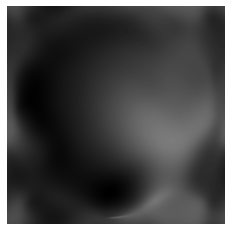

bart ecalib -m1 -P -c0 /tmp/tmpv0ukgqw0in0 /tmp/tmpv0ukgqw0out0
Done.
PSNR: 27.11251651413168 SSIM: 0.7175718942125411


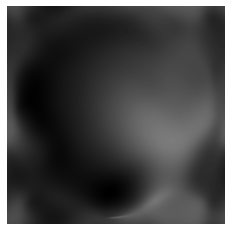

bart ecalib -m1 -W -c0 /tmp/tmpd86f_r4lin0 /tmp/tmpd86f_r4lout0
Done.
PSNR: 34.25881204982586 SSIM: 0.8027548873858457


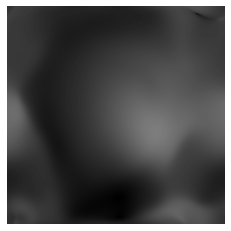

In [3]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.0005)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpsrvw6l9uin0 /tmp/tmpsrvw6l9uout0
Done.


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


PSNR: 22.86602728436349 SSIM: 0.7470014569053837


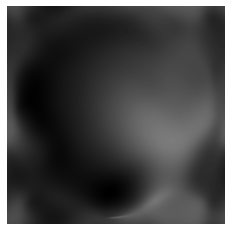

bart ecalib -m1 -P -c0 /tmp/tmpk5_zn67yin0 /tmp/tmpk5_zn67yout0
Done.


In [ ]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.05)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpv0pcdhvpin0 /tmp/tmpv0pcdhvpout0
Done.
PSNR: 26.675493085096633 SSIM: 0.737215274863627


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


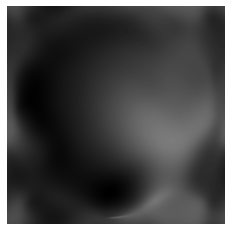

bart ecalib -m1 -P -c0 /tmp/tmpp27pyd3vin0 /tmp/tmpp27pyd3vout0
Done.


In [ ]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.01)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpv0pcdhvpin0 /tmp/tmpv0pcdhvpout0
Done.
PSNR: 26.675493085096633 SSIM: 0.737215274863627


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


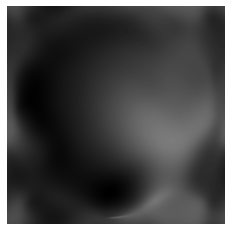

bart ecalib -m1 -P -c0 /tmp/tmpp27pyd3vin0 /tmp/tmpp27pyd3vout0
Done.


In [ ]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.01)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpuemzb68din0 /tmp/tmpuemzb68dout0
Done.
PSNR: 23.802616625321576 SSIM: 0.715464229078506


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


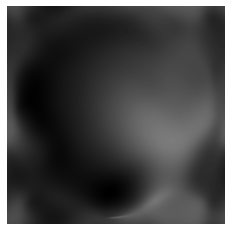

bart ecalib -m1 -P -c0 /tmp/tmpmo8cu3rfin0 /tmp/tmpmo8cu3rfout0
Done.
PSNR: 23.80307835521226 SSIM: 0.7154651841986222


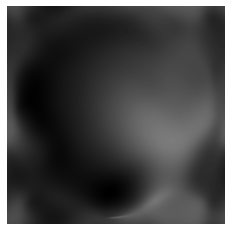

bart ecalib -m1 -W -c0 /tmp/tmp0ml2tztzin0 /tmp/tmp0ml2tztzout0
Done.
PSNR: 34.247122180138454 SSIM: 0.8024472451930431


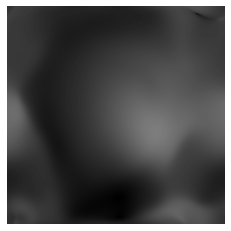

In [3]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(10000*slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.0)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpipfz53smin0 /tmp/tmpipfz53smout0
Done.
PSNR: 23.802616625321576 SSIM: 0.715464229078514


/data0/wangyuwan/fastmri--varnet/JNU_SZTU_PROJECT/ZGRAPPA_model_work/ONLY_SENSE/fastMRI_sense/fastmri_examples/varnet/batch_sense.py:30: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_alias = torch.sqrt(torch.prod(torch.tensor(acc_factor))) * ismrm_transform_kspace_to_image(inp[b], [0, 1])


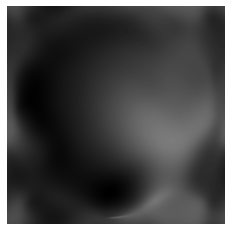

bart ecalib -m1 -P -c0 /tmp/tmpni0phatiin0 /tmp/tmpni0phatiout0
Done.
PSNR: 23.80307835521226 SSIM: 0.7154651841986195


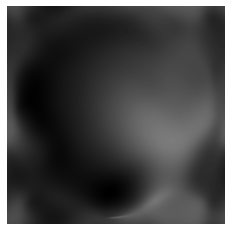

bart ecalib -m1 -W -c0 /tmp/tmpqtw7cvkoin0 /tmp/tmpqtw7cvkoout0
Done.
PSNR: 34.247122180138454 SSIM: 0.8024472451930416


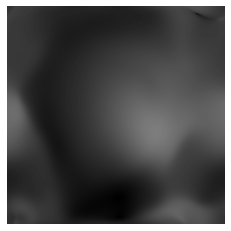

In [3]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(slice_sub_kspace,slice_sens_map/(abs(final_gold_sens).max()),acc_factor,reg=0.0)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

bart ecalib -m1 -c0 /tmp/tmpd930eyp9in0 /tmp/tmpd930eyp9out0
Done.
PSNR: 24.464431494494683 SSIM: 0.7174054865698031


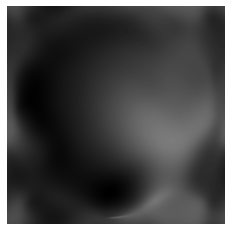

bart ecalib -m1 -P -c0 /tmp/tmpijp4i8_0in0 /tmp/tmpijp4i8_0out0
Done.
PSNR: 24.46312283641241 SSIM: 0.7174044688698585


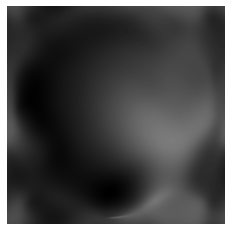

bart ecalib -m1 -W -c0 /tmp/tmp56mmd9dwin0 /tmp/tmp56mmd9dwout0
Done.
PSNR: 34.249682237986 SSIM: 0.8025093560547576


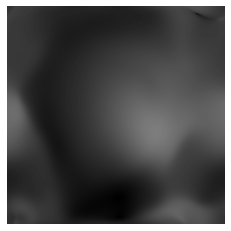

In [19]:
cmd_list = ('ecalib -m1 -c0','ecalib -m1 -P -c0','ecalib -m1 -W -c0')
for cmd in cmd_list:
    sens_maps = mriutils.bart(1, cmd, kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_maps[0].transpose(2,0,1)
    target = mrfft.sos(mrfft.ifft2c(kspace,(-1,-2)),0)
    sens_map = torch.from_numpy(final_gold_sens)
    slice_sens_map = sens_map.permute(1,2,0)[None]     
    I0 = SENSE(slice_sub_kspace,slice_sens_map,acc_factor,reg=0.001)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target)/abs(target).max()
    norm_recon = (abs(I0.numpy())[0])/(abs(I0.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
    plt.figure()
    plt.imshow(np.abs(sens_map[0,:,:]),cmap='gray',vmax=norm_recon.max())
    plt.axis('off')
    plt.show()

(-0.5, 383.5, 383.5, -0.5)

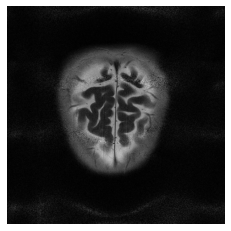

In [3]:
import matplotlib.pyplot as plt
plt.imshow(norm_recon,cmap='gray',vmax=norm_recon.max())
plt.axis('off')

In [5]:
import h5py
import numpy as np
from fast_sense import SENSE
import mriutils
import os
import torch
import scipy.io
os.environ["BART_PATH"]    = 'bart'
os.environ["OMP_NUM_THREADS"] = "1"
fname = 'COIL_FASTMRI_noshift/multicoil_test/file_brain_AXT2_210_2100295.h5'
from numpy.fft import fft, fft2 as fft2d, ifft2 as ifft2d, ifft, ifftshift, fftshift
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
def fft2c(x, axes=(- 2, - 1)):
    '''
    Centered fft
    Note: fft2 applies fft to last 2 axes by default
    :param x: 2D onwards. e.g: if its 3d, x.shape = (n,row,col). 4d:x.shape = (n,slice,row,col)
    :return:
    '''
    # axes = (len(x.shape)-2, len(x.shape)-1)  # get last 2 axes
    #axes = (-2, -1)  # get last 2 axes
    res = fftshift(fft2d(ifftshift(x), axes=axes, norm="ortho"))
    return res

def ifft2c(x, axes=(- 2, - 1)):
    '''
    Centered ifft
    Note: fft2 applies fft to last 2 axes by default
    :param x: 2D onwards. e.g: if its 3d, x.shape = (n,row,col). 4d:x.shape = (n,slice,row,col)
    :return:
    '''
    #axes = (-2, -1)  # get last 2 axes
    res = fftshift(ifft2d(ifftshift(x), axes=axes, norm="ortho"))
    return res
def center_crop(data, shape):
    if not (0 < shape[0] <= data.shape[-2] and 0 < shape[1] <= data.shape[-1]):
        raise ValueError("Invalid shapes.")

    w_from = (data.shape[-2] - shape[0]) // 2
    h_from = (data.shape[-1] - shape[1]) // 2
    w_to = w_from + shape[0]
    h_to = h_from + shape[1]

    return data[..., w_from:w_to, h_from:h_to]
index=10
with h5py.File(fname, "r") as hf:
    kspace = hf["kspace"][index]
    print(kspace.shape)
    rss = hf["reconstruction_rss"][index]
    # print(target.shape)
    height,weight = rss.shape
    kspace = fft2c(center_crop(ifft2c(kspace),(height,weight)))
    
    # mmax = target.max()
    # norm_kspace = kspace/mmax
    # print(norm_kspace.shape)
    # norm_target = target/mmax
    
    # final_gold_sens = hf['sens_map'][index]
    # tmp_sens_maps = []

    # for slice_index in range(kspace.shape[0]):
    #     slice_kspace = kspace[slice_index]
        # coilsen = mriutils.bart(1, 'ecalib  -m1 -W -c0', slice_kspace.transpose((1, 2, 0))[None,...])[0].transpose(2,0,1)#(16, 384, 384)
    sens_map = mriutils.bart(1, 'ecalib -m1 -W -c0', kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_map[0].transpose(2,0,1)  # (16,384,384)  
    

    target2 = np.sum((ifft2c(kspace) * np.conj(final_gold_sens)),axis=0)
    
    # mmax = abs(target).max()
    # norm_kspace = kspace/mmax
    # norm_target = abs(target)/mmax
    
    
    real_mask = np.zeros(kspace.shape)
    # for index in range(real_mask.shape[0]):
    real_mask[:,(index%3)::3,:] = 1
    real_masked_kspace = kspace*real_mask#(16,384,384)
   

    print(real_masked_kspace.dtype)
    subsample_kspace_complex = torch.from_numpy(real_masked_kspace)
    print(subsample_kspace_complex.shape)
    sens_map = torch.from_numpy(final_gold_sens)#(16,384,384)


    
    R = 3
    acc_factor = torch.tensor(R)
    # recon = []
    # for slice_index in range(16):
    slice_sens_map = sens_map.permute(1,2,0)[None]
    slice_sub_kspace = subsample_kspace_complex.permute(1,2,0)[None]
        ### 输入inp形状应为 [batch, kx, ky, coil]
        # 输入csm形状应为 [batch, kx, ky, coil]
        
    I2 = SENSE(slice_sub_kspace,slice_sens_map,acc_factor)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target2)/abs(target2).max()
    norm_recon = (abs(I2.numpy())[0])/(abs(I2.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
        # I0 = I1[...,None]
        # recon.append(I0)
    # final_recon = torch.cat(recon,dim=-1)
    # final_recon = abs(final_recon[:,0]) 
    # final_recon = final_recon/final_recon.max()

(16, 768, 396)
bart ecalib -m1 -W -c0 /tmp/tmpiqz68w0bin0 /tmp/tmpiqz68w0bout0
Done.
complex128
torch.Size([16, 384, 384])
PSNR: 33.546411506808155 SSIM: 0.7394148974814594


In [1]:
import h5py
import numpy as np
from fast_sense import SENSE
import mriutils
import os
import torch
import scipy.io
os.environ["BART_PATH"]    = 'bart'
os.environ["OMP_NUM_THREADS"] = "1"
fname = 'COIL_FASTMRI_noshift/multicoil_test/file_brain_AXT2_210_2100295.h5'
from numpy.fft import fft, fft2 as fft2d, ifft2 as ifft2d, ifft, ifftshift, fftshift
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio as psnr
def fft2c(x, axes=(- 2, - 1)):
    '''
    Centered fft
    Note: fft2 applies fft to last 2 axes by default
    :param x: 2D onwards. e.g: if its 3d, x.shape = (n,row,col). 4d:x.shape = (n,slice,row,col)
    :return:
    '''
    # axes = (len(x.shape)-2, len(x.shape)-1)  # get last 2 axes
    #axes = (-2, -1)  # get last 2 axes
    res = fftshift(fft2d(ifftshift(x), axes=axes, norm="ortho"))
    return res

def ifft2c(x, axes=(- 2, - 1)):
    '''
    Centered ifft
    Note: fft2 applies fft to last 2 axes by default
    :param x: 2D onwards. e.g: if its 3d, x.shape = (n,row,col). 4d:x.shape = (n,slice,row,col)
    :return:
    '''
    #axes = (-2, -1)  # get last 2 axes
    res = fftshift(ifft2d(ifftshift(x), axes=axes, norm="ortho"))
    return res
def center_crop(data, shape):
    if not (0 < shape[0] <= data.shape[-2] and 0 < shape[1] <= data.shape[-1]):
        raise ValueError("Invalid shapes.")

    w_from = (data.shape[-2] - shape[0]) // 2
    h_from = (data.shape[-1] - shape[1]) // 2
    w_to = w_from + shape[0]
    h_to = h_from + shape[1]

    return data[..., w_from:w_to, h_from:h_to]
index=10
with h5py.File(fname, "r") as hf:
    kspace = hf["kspace"][index]
    print(kspace.shape)
    rss = hf["reconstruction_rss"][index]
    # print(target.shape)
    height,weight = rss.shape
    kspace = fft2c(center_crop(ifft2c(kspace),(height,weight)))
    
    # mmax = target.max()
    # norm_kspace = kspace/mmax
    # print(norm_kspace.shape)
    # norm_target = target/mmax
    
    # final_gold_sens = hf['sens_map'][index]
    # tmp_sens_maps = []

    # for slice_index in range(kspace.shape[0]):
    #     slice_kspace = kspace[slice_index]
        # coilsen = mriutils.bart(1, 'ecalib  -m1 -W -c0', slice_kspace.transpose((1, 2, 0))[None,...])[0].transpose(2,0,1)#(16, 384, 384)
    sens_map = mriutils.bart(1, 'ecalib -m1 -W -P -c0', kspace.transpose((1,2,0))[None,...])
    final_gold_sens = sens_map[0].transpose(2,0,1)  # (16,384,384)  
    

    target2 = np.sum((ifft2c(kspace) * np.conj(final_gold_sens)),axis=0)
    
    # mmax = abs(target).max()
    # norm_kspace = kspace/mmax
    # norm_target = abs(target)/mmax
    
    
    real_mask = np.zeros(kspace.shape)
    # for index in range(real_mask.shape[0]):
    real_mask[:,(index%3)::3,:] = 1
    real_masked_kspace = kspace*real_mask#(16,384,384)
   

    print(real_masked_kspace.dtype)
    subsample_kspace_complex = torch.from_numpy(real_masked_kspace)
    print(subsample_kspace_complex.shape)
    sens_map = torch.from_numpy(final_gold_sens)#(16,384,384)


    
    R = 3
    acc_factor = torch.tensor(R)
    # recon = []
    # for slice_index in range(16):
    slice_sens_map = sens_map.permute(1,2,0)[None]
    slice_sub_kspace = subsample_kspace_complex.permute(1,2,0)[None]
        ### 输入inp形状应为 [batch, kx, ky, coil]
        # 输入csm形状应为 [batch, kx, ky, coil]
        
    I2 = SENSE(slice_sub_kspace,slice_sens_map,acc_factor)##输出为（batch,x,y,coil）转为 (batch,coil,x,y)
    norm_target = abs(target2)/abs(target2).max()
    norm_recon = (abs(I2.numpy())[0])/(abs(I2.numpy())[0]).max()
    PSNR = psnr(norm_recon, norm_target, data_range=1)
    SSIM = ssim(norm_recon, norm_target, data_range=1)
    print("PSNR:",PSNR,"SSIM:",SSIM)
        # I0 = I1[...,None]
        # recon.append(I0)
    # final_recon = torch.cat(recon,dim=-1)
    # final_recon = abs(final_recon[:,0]) 
    # final_recon = final_recon/final_recon.max()

/opt/tljh/user/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(16, 768, 396)
bart ecalib -m1 -W -P -c0 /tmp/tmpsik6g59bin0 /tmp/tmpsik6g59bout0
Done.
complex128
torch.Size([16, 384, 384])
PSNR: 33.5464098299473 SSIM: 0.7394147095585586


In [10]:
abs(I1).max()

tensor(0.0004, dtype=torch.float64)

In [11]:
abs(target).max()

0.0005114112084137409

In [13]:
I1.shape

torch.Size([1, 384, 384])

In [14]:
target.shape

(384, 384)